# 📡 TelecomX — Análisis de Evasión de Clientes (Churn)

**Programa:** Oracle Next Education (ONE) · Alura Latam  
**Challenge:** 2 · Data Science  


Este notebook documenta el proceso completo de **ETL + Análisis Exploratorio** para identificar los factores que provocan la evasión de clientes en Telecom X.

---

### El proyecto sigue una arquitectura ETL dividida en 3 fases:

⚙️ Fase 1 — Extracción (Extract)

🔧 FASE 2 — Transformación (T · Transform)

📊 FASE 3 — Carga y Análisis (L · Load & Analysis)




---

#⚙️ Fase 1 — Extracción (Extract)

---

## 📌 Paso 1: Extracción de Datos desde la API

Para iniciar el análisis, cargamos los datos directamente desde la API de **Telecom X**. Los datos están disponibles en formato **JSON** y contienen información esencial sobre los clientes: datos demográficos, tipo de servicio contratado y estado de evasión.

**Fuente de datos (API):**
🔗 `https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json`

**¿Qué haremos?**
- ✅ Cargar los datos directamente desde la API utilizando Python.
- ✅ Convertir los datos a un **DataFrame de Pandas** para facilitar su manipulación.

In [45]:
# --- Configuración de backend ---
%matplotlib inline

# --- Importación de librerías necesarias ---
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print('✅ Librerías importadas correctamente.')

# Estilo visual global
sns.set_theme(style='darkgrid', palette='deep')
plt.rcParams['figure.facecolor'] = '#F8F4FF'
plt.rcParams['axes.facecolor'] = '#F0EBFF'


✅ Librerías importadas correctamente.


In [17]:
# --- Extracción de datos desde la API ---
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

print('🔄 Iniciando extracción de datos desde la API...')

try:
    # 1. Realizar la solicitud HTTP a la API
    respuesta = requests.get(url, timeout=20)
    respuesta.raise_for_status()  # Lanza error si el status code no es 200

    # 2. Parsear la respuesta como JSON
    datos_json = respuesta.json()

    # 3. Convertir a DataFrame
    # pd.json_normalize() expande la estructura JSON anidada en columnas individuales
    # (sub-objetos como 'customer', 'phone', 'account' se convierten en columnas separadas)
    df = pd.json_normalize(datos_json)

    print('✅ Extracción exitosa.')
    print(f'📊 El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.')

except requests.exceptions.ConnectionError:
    print('❌ Error: No se pudo conectar con la API. Verifica tu conexión a internet.')
except requests.exceptions.Timeout:
    print('❌ Error: La solicitud tardó demasiado. Intenta nuevamente.')
except Exception as e:
    print(f'❌ Error inesperado: {e}')

🔄 Iniciando extracción de datos desde la API...
✅ Extracción exitosa.
📊 El dataset tiene 7267 filas y 21 columnas.


In [18]:
# --- Vista previa del dataset ---
print('📋 Primeras 5 filas del dataset:')
df.head()

📋 Primeras 5 filas del dataset:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



---
# 🔧 FASE 2 — Transformación (T · Transform)
---

## 📌 Paso 2: Conoce el Conjunto de Datos

Ahora que hemos extraído los datos, es fundamental **comprender la estructura del dataset** y el significado de sus columnas. Esta etapa nos ayuda a identificar qué variables son más relevantes para el análisis de evasión.

**¿Qué haremos?**
- ✅ Explorar las columnas del dataset y verificar sus **tipos de datos**.
- ✅ Consultar el diccionario para comprender el significado de las variables.
- ✅ Identificar las columnas más relevantes para el análisis de evasión.

📌 **Referencias:** [`DataFrame.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) · [`DataFrame.dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)

In [19]:
# --- Información general del dataset ---
print('=' * 65)
print('📋  INFORMACIÓN GENERAL DEL DATASET  (df.info())')
print('=' * 65)
df.info()

📋  INFORMACIÓN GENERAL DEL DATASET  (df.info())
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  

In [20]:
# --- Tipos de datos por columna ---
print('=' * 65)
print('🔢  TIPOS DE DATOS POR COLUMNA  (df.dtypes)')
print('=' * 65)
print(df.dtypes)

🔢  TIPOS DE DATOS POR COLUMNA  (df.dtypes)
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object


In [21]:
# --- Diccionario de datos ---
# Descripción de las columnas principales del dataset

diccionario = {
    'Columna': [
        'customerID', 'Churn',
        'customer.gender', 'customer.SeniorCitizen', 'customer.Partner',
        'customer.Dependents', 'customer.tenure',
        'phone.PhoneService', 'phone.MultipleLines',
        'internet.InternetService', 'internet.OnlineSecurity',
        'internet.OnlineBackup', 'internet.DeviceProtection',
        'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
        'account.Contract', 'account.PaperlessBilling',
        'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total'
    ],
    'Tipo': [
        'string', 'string (Yes/No)',
        'string (Male/Female)', 'int (0/1)', 'string (Yes/No)',
        'string (Yes/No)', 'int (meses)',
        'string (Yes/No)', 'string (Yes/No/No phone service)',
        'string (DSL/Fiber optic/No)', 'string (Yes/No/No internet service)',
        'string (Yes/No/No internet service)', 'string (Yes/No/No internet service)',
        'string (Yes/No/No internet service)', 'string (Yes/No/No internet service)',
        'string (Yes/No/No internet service)',
        'string (Month-to-month/One year/Two year)', 'string (Yes/No)',
        'string (Electronic check/Mailed check/...)', 'float (USD)', 'float (USD)'
    ],
    'Descripcion': [
        'Identificador único del cliente',
        '🎯 Variable objetivo: si el cliente canceló(dio de baja) el servicio',
        'Género del cliente.',
        'Indicador de cliente adulto mayor  (1 = Adulto mayor, 0 = No).',
        'Indica si el cliente tiene pareja.',
        'Indica si el cliente tiene dependientes económicos.',
        'Antigüedad del cliente en meses (indicador clave de permanencia y fidelización).',
        'Indica si el cliente tiene servicio telefónico activo.',
        'Indica si el cliente posee múltiples líneas telefónicas.',
        'Tipo de servicio de internet contratado.',
        'Servicio adicional de seguridad en línea.',
        'Servicio adicional de respaldo en la nube.',
        'Servicio adicional de protección de dispositivos.',
        'Servicio adicional de soporte técnico.',
        'Servicio de televisión en streaming.',
        'Servicio de películas en streaming.',
        'Tipo de contrato',
        'Indica si utiliza facturación digital.',
        'Método de pago utilizado por el cliente.',
        'Cargo mensual en dólares',
        'Total acumulado cobrado al cliente durante su ciclo de vida (USD).'
    ]
}

df_diccionario = pd.DataFrame(diccionario)
print('📖  DICCIONARIO DE DATOS')
display(df_diccionario)

📖  DICCIONARIO DE DATOS


,Columna,Tipo,Descripcion
0,customerID,string,Identificador único del cliente
1,Churn,string (Yes/No),🎯 Variable objetivo: si el cliente canceló(dio...
2,customer.gender,string (Male/Female),Género del cliente.
3,customer.SeniorCitizen,int (0/1),Indicador de cliente adulto mayor (1 = Adulto...
4,customer.Partner,string (Yes/No),Indica si el cliente tiene pareja.
5,customer.Dependents,string (Yes/No),Indica si el cliente tiene dependientes económ...
6,customer.tenure,int (meses),Antigüedad del cliente en meses (indicador cla...
7,phone.PhoneService,string (Yes/No),Indica si el cliente tiene servicio telefónico...
8,phone.MultipleLines,string (Yes/No/No phone service),Indica si el cliente posee múltiples líneas te...
9,internet.InternetService,string (DSL/Fiber optic/No),Tipo de servicio de internet contratado.


## 📌 Paso 3: Comprobación de Incoherencias en los Datos

Verificamos si hay **problemas en los datos** que puedan afectar el análisis. Prestamos atención a:
- 🔍 Valores **ausentes (NaN)**
- 🔍 Registros **duplicados**
- 🔍 **Errores de formato** e inconsistencias en las categorías

📌 **Referencias:** [`pandas.unique()`](https://pandas.pydata.org/docs/reference/api/pandas.unique.html) · [`pandas.Series.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

In [22]:
# --- Verificación de valores nulos ---
print('=' * 65)
print('🔍  VALORES NULOS POR COLUMNA')
print('=' * 65)
nulos = df.isnull().sum().sort_values(ascending=False)
nulos_filtrados = nulos[nulos > 0]

if len(nulos_filtrados) > 0:
    print(nulos_filtrados)
else:
    print('✅ No se encontraron valores nulos')

🔍  VALORES NULOS POR COLUMNA
✅ No se encontraron valores nulos


In [23]:
# --- Verificación de duplicados ---
print('=' * 65)
print('🔍  VERIFICACIÓN DE DUPLICADOS')
print('=' * 65)
duplicados = df.duplicated().sum()

if duplicados > 0:
    print(f'⚠️ Se encontraron {duplicados} filas duplicadas')
else:
    print('✅ No se encontraron filas duplicadas')

🔍  VERIFICACIÓN DE DUPLICADOS
✅ No se encontraron filas duplicadas


In [24]:
# --- Valores únicos en columnas categóricas clave ---
# pandas.unique() permite detectar valores inesperados o mal escritos
print('=' * 65)
print('🔍  VALORES ÚNICOS EN COLUMNAS CATEGÓRICAS CLAVE')
print('=' * 65)

columnas_clave = [
    'customer.gender', 'account.Contract',
    'account.PaymentMethod', 'internet.InternetService', 'Churn'
]

for col in columnas_clave:
    if col in df.columns:
        print(f'\n📌 Columna: "{col}"')

        valores = df[col].astype(str).str.strip()

        print(f'   Valores únicos ordenados: {sorted(valores.unique())}')
        print(valores.value_counts(dropna=False))

🔍  VALORES ÚNICOS EN COLUMNAS CATEGÓRICAS CLAVE

📌 Columna: "customer.gender"
   Valores únicos ordenados: ['Female', 'Male']
customer.gender
Male      3675
Female    3592
Name: count, dtype: int64

📌 Columna: "account.Contract"
   Valores únicos ordenados: ['Month-to-month', 'One year', 'Two year']
account.Contract
Month-to-month    4005
Two year          1743
One year          1519
Name: count, dtype: int64

📌 Columna: "account.PaymentMethod"
   Valores únicos ordenados: ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
account.PaymentMethod
Electronic check             2445
Mailed check                 1665
Bank transfer (automatic)    1589
Credit card (automatic)      1568
Name: count, dtype: int64

📌 Columna: "internet.InternetService"
   Valores únicos ordenados: ['DSL', 'Fiber optic', 'No']
internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64

📌 Columna: "Churn"
   Valores únicos

In [25]:
# --- Verificación de columnas con posibles errores de tipo ---
print('=' * 65)
print('🔍  AUDITORÍA DE TIPO DE DATO - account.Charges.Total')
print('=' * 65)

col = 'account.Charges.Total'

# Tipo actual
print(f'Tipo de dato actual: {df[col].dtype}')

# Intentar conversión
conversion = pd.to_numeric(df[col], errors='coerce')

# Detectar valores problemáticos reales
errores_conversion = df[col][conversion.isna() & df[col].notna()]

print(f'\nTotal de registros: {len(df)}')
print(f'Valores originalmente nulos: {df[col].isna().sum()}')
print(f'Valores no convertibles reales: {len(errores_conversion)}')

if len(errores_conversion) > 0:
    print('\nEjemplos de valores problemáticos:')
    print(errores_conversion.head())
else:
    print('\n✅ No se detectaron errores de conversión')

🔍  AUDITORÍA DE TIPO DE DATO - account.Charges.Total
Tipo de dato actual: object

Total de registros: 7267
Valores originalmente nulos: 0
Valores no convertibles reales: 11

Ejemplos de valores problemáticos:
975      
1775     
1955     
2075     
2232     
Name: account.Charges.Total, dtype: object


## 📌 Paso 4: Manejo de Inconsistencias

Ahora que hemos identificado las inconsistencias, aplicamos las **correcciones necesarias** para que los datos estén completos y coherentes.

**Acciones a realizar:**
- ✅ Convertir columnas de cargos a tipo numérico.
- ✅ Rellenar valores nulos generados por la conversión.
- ✅ Eliminar espacios en blanco ocultos en strings.
- ✅ Eliminar registros duplicados si los hay.

📌 **Referencia:** [Manipulación de strings en Pandas](https://www.aluracursos.com/blog/manipulacion-de-strings-en-pandas-lower-replace-startswith-y-contains)

In [26]:
# --- Manejo de Inconsistencias ---

print('=' * 65)
print('🧹 LIMPIEZA Y ESTANDARIZACIÓN DE DATOS')
print('=' * 65)


# 1️⃣ Limpiar espacios en columnas tipo object
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.strip()
print('✅ Espacios en blanco eliminados.')

# 2️⃣ Conversión a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Monthly'] = pd.to_numeric(df['account.Charges.Monthly'], errors='coerce')

print(f'Nulos en Charges.Total:   {df["account.Charges.Total"].isna().sum()}')
print(f'Nulos en Charges.Monthly: {df["account.Charges.Monthly"].isna().sum()}')

# 3️⃣ Imputación: nulos → 0 (clientes sin historial de cobro aún)
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)
df['account.Charges.Monthly'] = df['account.Charges.Monthly'].fillna(0)


# ⚠️ NOTA: La conversión de Churn (Yes/No → 1/0) se realiza en el
# Paso 6 (Estandarización), DESPUÉS del rename a 'Evasion',
# para mantener consistencia en todos los gráficos posteriores.

# 4️⃣ Eliminación de duplicados
filas_antes = df.shape[0]
df = df.drop_duplicates()
print(f'🗑️  Duplicados eliminados: {filas_antes - df.shape[0]}')

print('\n✅ Proceso de limpieza completado.')
print(f'Dataset: {df.shape[0]} filas × {df.shape[1]} columnas.')

🧹 LIMPIEZA Y ESTANDARIZACIÓN DE DATOS
✅ Espacios en blanco eliminados.
Nulos en Charges.Total:   11
Nulos en Charges.Monthly: 0
🗑️  Duplicados eliminados: 0

✅ Proceso de limpieza completado.
Dataset: 7267 filas × 21 columnas.


## 📌 Paso 5: Columna de Cuentas Diarias *(Recomendado)*

Ahora que los datos están limpios, creamos la columna **`Cuentas_Diarias`**. La idea es descomponer la facturación mensual en un **valor diario**, lo que permite comparar clientes con distintas duraciones de contrato en una misma escala temporal.

**¿Por qué es útil esta columna?**
- Facilita comparar el gasto real entre clientes con distintos planes.
- Permite detectar si los clientes que más gastan por día tienen mayor tendencia a evadir.
- Sirve como insumo directo para el análisis de correlación y futuros modelos predictivos.

> 📐 **Fórmula:** `Cuentas_Diarias = Cargos_Mensuales ÷ 30`

In [27]:
# --- Paso 5: Columna de Cuentas Diarias ---
# Cuentas_Diarias es una columna ADICIONAL que complementa a
# account.Charges.Monthly — no la reemplaza.
# Ambas columnas coexistirán en el dataset final.
#
# Fórmula: Cuentas_Diarias = account.Charges.Monthly / 30

print('=' * 65)
print('📌 COLUMNA ADICIONAL: Cuentas_Diarias')
print('=' * 65)

# Validación previa
ceros = (df['account.Charges.Monthly'] == 0).sum()
if ceros > 0:
    print(f'⚠  Clientes con cargo mensual = 0: {ceros}')

# Crear la columna en df (ANTES del renombrado del Paso 6)

#df['Cuentas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)

#total_cols_antes = df.shape[1] - 1
#print(f'✅ Columna creada. df pasó de {total_cols_antes} a {df.shape[1]} columnas.')
cols_antes = df.shape[1]
df['Cuentas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)
cols_despues = df.shape[1]

print(f'✅ Columna creada. df pasó de {cols_antes} → {cols_despues} columnas.')

print('\n📊 Estadísticas descriptivas de Cuentas_Diarias:')
print(df['Cuentas_Diarias'].describe().round(2))

print('\n📋 Muestra comparativa — cargo mensual vs diario:')
print(df[['account.Charges.Monthly', 'Cuentas_Diarias']].head(8).to_string())

print('\n📊 Promedio de cuenta diaria por estado de Churn:')
print(
    df.groupby('Churn')['Cuentas_Diarias']
      .mean()
      .round(2)
      .rename({'Yes': 'Cancelaron', 'No': 'Activos'})
)



📌 COLUMNA ADICIONAL: Cuentas_Diarias
✅ Columna creada. df pasó de 21 → 22 columnas.

📊 Estadísticas descriptivas de Cuentas_Diarias:
count    7267.00
mean        2.16
std         1.00
min         0.61
25%         1.18
50%         2.34
75%         3.00
max         3.96
Name: Cuentas_Diarias, dtype: float64

📋 Muestra comparativa — cargo mensual vs diario:
   account.Charges.Monthly  Cuentas_Diarias
0                    65.60             2.19
1                    59.90             2.00
2                    73.90             2.46
3                    98.00             3.27
4                    83.90             2.80
5                    69.40             2.31
6                   109.70             3.66
7                    84.65             2.82

📊 Promedio de cuenta diaria por estado de Churn:
Churn
              2.11
Activos       2.04
Cancelaron    2.48
Name: Cuentas_Diarias, dtype: float64


## 📌 Paso 6: Estandarización y Transformación de Datos *(Recomendado)*

La estandarización hace que la información sea más **consistente, comprensible y lista para el análisis**. Aunque es opcional, mejora significativamente la claridad de los resultados al compartirlos con equipos no técnicos.

**Acciones en esta etapa:**

| Transformación | Detalle | Motivo |
|---|---|---|
| Renombrar columnas | Inglés → Español | Legibilidad para stakeholders hispanohablantes |
| Codificar `Churn` | `Yes/No` → `1/0` (`Evasion_Binaria`) | Permite cálculos matemáticos y correlaciones |
| Traducir valores binarios | `Yes/No` → `Sí/No` en columnas de servicio | Coherencia con el idioma del análisis |
| Traducir género | `Male/Female` → `Masculino/Femenino` | Consistencia con el idioma del informe |

> ⚠️ La columna **`Cuentas_Diarias`** creada en el paso anterior se conserva automáticamente en `df_limpio` porque `rename()` solo modifica las columnas listadas en el diccionario.

In [34]:
# --- Estandarización: Renombrar columnas (inglés → español) ---

diccionario_nombres = {
    'customerID':                   'ID_Cliente',
    'Churn':                        'Evasion',
    'customer.gender':              'Genero',
    'customer.SeniorCitizen':       'Adulto_Mayor',
    'customer.Partner':             'Tiene_Pareja',
    'customer.Dependents':          'Tiene_Dependientes',
    'customer.tenure':              'Meses_Contrato',
    'phone.PhoneService':           'Servicio_Telefono',
    'phone.MultipleLines':          'Multiples_Lineas',
    'internet.InternetService':     'Tipo_Internet',
    'internet.OnlineSecurity':      'Seguridad_Online',
    'internet.OnlineBackup':        'Backup_Online',
    'internet.DeviceProtection':    'Proteccion_Dispositivo',
    'internet.TechSupport':         'Soporte_Tecnico',
    'internet.StreamingTV':         'Streaming_TV',
    'internet.StreamingMovies':     'Streaming_Peliculas',
    'account.Contract':             'Tipo_Contrato',
    'account.PaperlessBilling':     'Factura_Digital',
    'account.PaymentMethod':        'Metodo_Pago',
    'account.Charges.Monthly':      'Cargos_Mensuales',
    'account.Charges.Total':        'Cargos_Totales'
}

df_limpio = df.rename(columns=diccionario_nombres)

# Nota: Cuentas_Diarias fue creada en el Paso 5 sobre df.
# rename() la conserva en df_limpio automáticamente (no está en el diccionario).

# --- Traducción de valores Yes/No → Sí/No ---
# IMPORTANTE: en este punto Evasion aún tiene 'Yes'/'No' (strings originales)
# porque en el Paso 4 ya NO se convirtió a binario
columnas_sino = [
    'Evasion', 'Tiene_Pareja', 'Tiene_Dependientes',
    'Servicio_Telefono', 'Factura_Digital',
    'Seguridad_Online', 'Backup_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas'
]
for col in columnas_sino:
    if col in df_limpio.columns:
        df_limpio[col] = df_limpio[col].map({'Yes': 'Sí', 'No': 'No'})

# --- Traducción género ---
df_limpio['Genero'] = df_limpio['Genero'].replace({
    'Male':   'Masculino',
    'Female': 'Femenino'
})

# --- Traducción Multiples Líneas ---
df_limpio['Multiples_Lineas'] = df_limpio['Multiples_Lineas'].replace({
    'Yes': 'Sí',
    'No':  'No',
    'No phone service': 'Sin servicio telefónico'
})

# --- Traducción tipo de internet ---
df_limpio['Tipo_Internet'] = df_limpio['Tipo_Internet'].replace({
    'No': 'Sin internet'
})

# --- Columna Evasion_Binaria (Sí→1, No→0) ---
# Ahora Evasion tiene 'Sí'/'No' → el mapeo funciona correctamente
df_limpio['Evasion_Binaria'] = df_limpio['Evasion'].map({'Sí': 1, 'No': 0})

print('\n📊 Distribución Evasion_Binaria:')
print(df_limpio['Evasion_Binaria'].value_counts())

# Verificar que no quedaron NaN (antes usábamos fillna(-1) que enmascaraba errores)
nulos_evasion = df_limpio['Evasion_Binaria'].isna().sum()
if nulos_evasion > 0:
    print(f'⚠️  {nulos_evasion} filas con valor inesperado en Evasion:')
    print(df_limpio[df_limpio['Evasion_Binaria'].isna()]['Evasion'].unique())
else:
    print('✅ Evasion_Binaria: sin valores nulos.')

print('✅ Datos estandarizados y traducidos al español.')
print(f'📊 Dataset limpio: {df_limpio.shape[0]} filas × {df_limpio.shape[1]} columnas')
print()
print('📋 Vista previa:')
display(df_limpio[['ID_Cliente', 'Evasion', 'Evasion_Binaria', 'Genero',
                   'Tipo_Contrato', 'Cargos_Mensuales', 'Cuentas_Diarias']].head(6))
print()
print('📌 Verificación de valores traducidos:')
print(f'  Géneros:          {sorted(df_limpio["Genero"].dropna().unique())}')
print(f'  Evasion:          {sorted(df_limpio["Evasion"].dropna().unique())}')
print(f'  Tipo Internet:    {sorted(df_limpio["Tipo_Internet"].dropna().unique())}')
print(f'  Multiples Líneas: {sorted(df_limpio["Multiples_Lineas"].dropna().unique())}')



📊 Distribución Evasion_Binaria:
Evasion_Binaria
0.0    5174
1.0    1869
Name: count, dtype: int64
⚠️  224 filas con valor inesperado en Evasion:
[nan]
✅ Datos estandarizados y traducidos al español.
📊 Dataset limpio: 7267 filas × 23 columnas

📋 Vista previa:


,ID_Cliente,Evasion,Evasion_Binaria,Genero,Tipo_Contrato,Cargos_Mensuales,Cuentas_Diarias
0,0002-ORFBO,No,0.0,Femenino,One year,65.6,2.19
1,0003-MKNFE,No,0.0,Masculino,Month-to-month,59.9,2.00
2,0004-TLHLJ,Sí,1.0,Masculino,Month-to-month,73.9,2.46
3,0011-IGKFF,Sí,1.0,Masculino,Month-to-month,98.0,3.27
4,0013-EXCHZ,Sí,1.0,Femenino,Month-to-month,83.9,2.80
5,0013-MHZWF,No,0.0,Femenino,Month-to-month,69.4,2.31



📌 Verificación de valores traducidos:
  Géneros:          ['Femenino', 'Masculino']
  Evasion:          ['No', 'Sí']
  Tipo Internet:    ['DSL', 'Fiber optic', 'Sin internet']
  Multiples Líneas: ['No', 'Sin servicio telefónico', 'Sí']


In [35]:
# Vista rápida del dataset limpio
print(f'Shape df_limpio: {df_limpio.shape}')
display(df_limpio.dtypes.rename('tipo').to_frame())

Shape df_limpio: (7267, 23)


,tipo
ID_Cliente,object
Evasion,object
Genero,object
Adulto_Mayor,int64
Tiene_Pareja,object
Tiene_Dependientes,object
Meses_Contrato,int64
Servicio_Telefono,object
Multiples_Lineas,object
Tipo_Internet,object



---
# 📊 FASE 3 — Carga y Análisis (L · Load & Analysis)
---

## 📌 Paso 7: Análisis Descriptivo

Comenzamos con un **análisis descriptivo** de los datos, calculando métricas como media, mediana y desviación estándar para comprender la distribución y el comportamiento de los clientes.

📌 **Referencia:** [`DataFrame.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [36]:
# --- Análisis Descriptivo ---
print('=' * 65)
print('📊  ESTADÍSTICAS DESCRIPTIVAS — VARIABLES NUMÉRICAS')
print('=' * 65)

cols_numericas = ['Meses_Contrato', 'Cargos_Mensuales', 'Cargos_Totales', 'Cuentas_Diarias']
display(df_limpio[cols_numericas].describe().round(2))

print('\n' + '=' * 65)
print('📊  DISTRIBUCIÓN DE LA VARIABLE OBJETIVO: EVASIÓN')
print('=' * 65)

conteo_evasion    = df_limpio['Evasion'].value_counts()
porcentaje_evasion = df_limpio['Evasion'].value_counts(normalize=True) * 100

resumen = pd.DataFrame({
    'Cantidad':       conteo_evasion,
    'Porcentaje (%)': porcentaje_evasion.round(2)
}).rename(index={'Sí': 'Cancelaron', 'No': 'Clientes Activos'})

print(resumen)

# Acceso seguro con la clave correcta ('Sí', no 1)
tasa_evasion = porcentaje_evasion.get('Sí', 0)
print(f"\n📌 Tasa de evasión total: {tasa_evasion:.2f}%")


📊  ESTADÍSTICAS DESCRIPTIVAS — VARIABLES NUMÉRICAS


,Meses_Contrato,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
count,7267.00,7267.00,7267.00,7267.00
mean,32.35,64.72,2277.18,2.16
std,24.57,30.13,2268.65,1.00
min,0.00,18.25,0.00,0.61
25%,9.00,35.42,396.20,1.18
50%,29.00,70.30,1389.20,2.34
75%,55.00,89.88,3778.52,3.00
max,72.00,118.75,8684.80,3.96



📊  DISTRIBUCIÓN DE LA VARIABLE OBJETIVO: EVASIÓN
                  Cantidad  Porcentaje (%)
Evasion                                   
Clientes Activos      5174           73.46
Cancelaron            1869           26.54

📌 Tasa de evasión total: 26.54%


## 📌 Paso 8: Distribución de Evasión

El objetivo es **comprender cómo está distribuida** la variable *churn* (evasión). Usamos gráficos para visualizar la proporción de clientes que permanecieron vs. los que se dieron de baja.

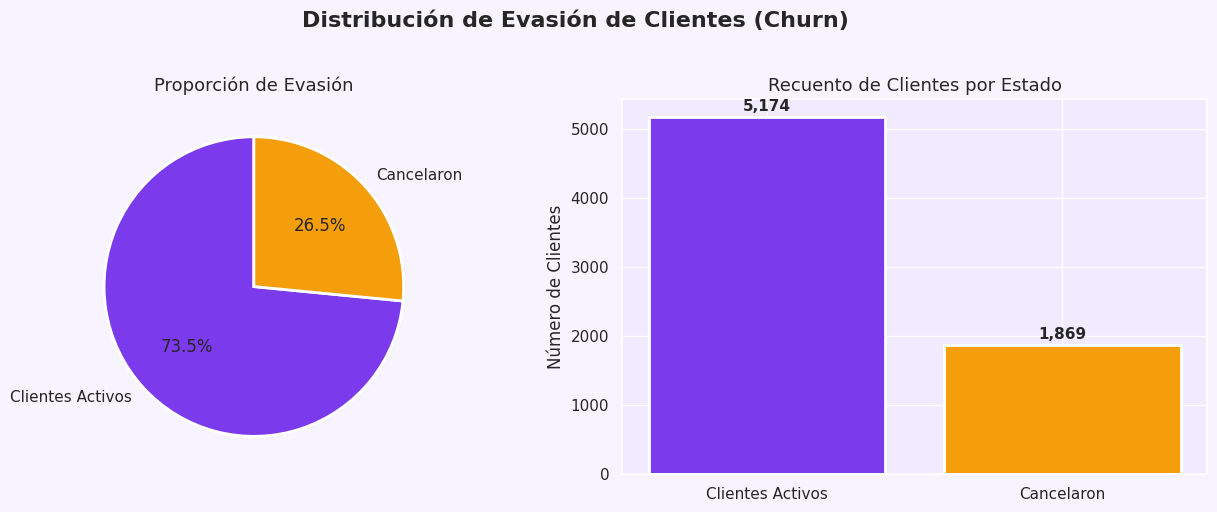


📌 De 7,043 clientes, 1,869 (26.5%) cancelaron el servicio.


In [39]:
# --- Distribución de Evasión ---
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle('Distribución de Evasión de Clientes (Churn)',
             fontsize=16, fontweight='bold', y=1.02)


# Reindexamos con las claves reales del campo: 'Sí' primero, 'No' después
conteo = df_limpio['Evasion'].value_counts().reindex(['No', 'Sí'])
labels = ['Clientes Activos', 'Cancelaron']
colores = ['#7C3AED', '#F59E0B'] #  Activos | Cancelaron

# --- Gráfico 1: Torta ---
axes[0].pie(
    conteo,
    labels=labels,
    autopct='%1.1f%%',
    colors=colores,
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}
)
axes[0].set_title('Proporción de Evasión', fontsize=13)

# --- Gráfico 2: Barras ---
bars = axes[1].bar(labels, conteo.values, color=colores, edgecolor='white', linewidth=2)
axes[1].set_title('Recuento de Clientes por Estado', fontsize=13)
axes[1].set_ylabel('Número de Clientes')

for bar, val in zip(bars, conteo.values):
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 40,
        f'{val:,}', ha='center', va='bottom', fontweight='bold', fontsize=11
    )

plt.tight_layout()
plt.show()

total = conteo.sum()
cancelaron = conteo.get('Sí', 0)
print(f"\n📌 De {total:,} clientes, {cancelaron:,} ({cancelaron/total*100:.1f}%) cancelaron el servicio.")


## 📌 Paso 9: Recuento de Evasión por Variables Categóricas

Exploramos cómo se distribuye la evasión según **variables categóricas** como género, tipo de contrato, método de pago y tipo de internet.

> Este análisis puede revelar patrones: ¿tienen los clientes de ciertos perfiles mayor tendencia a cancelar el servicio?

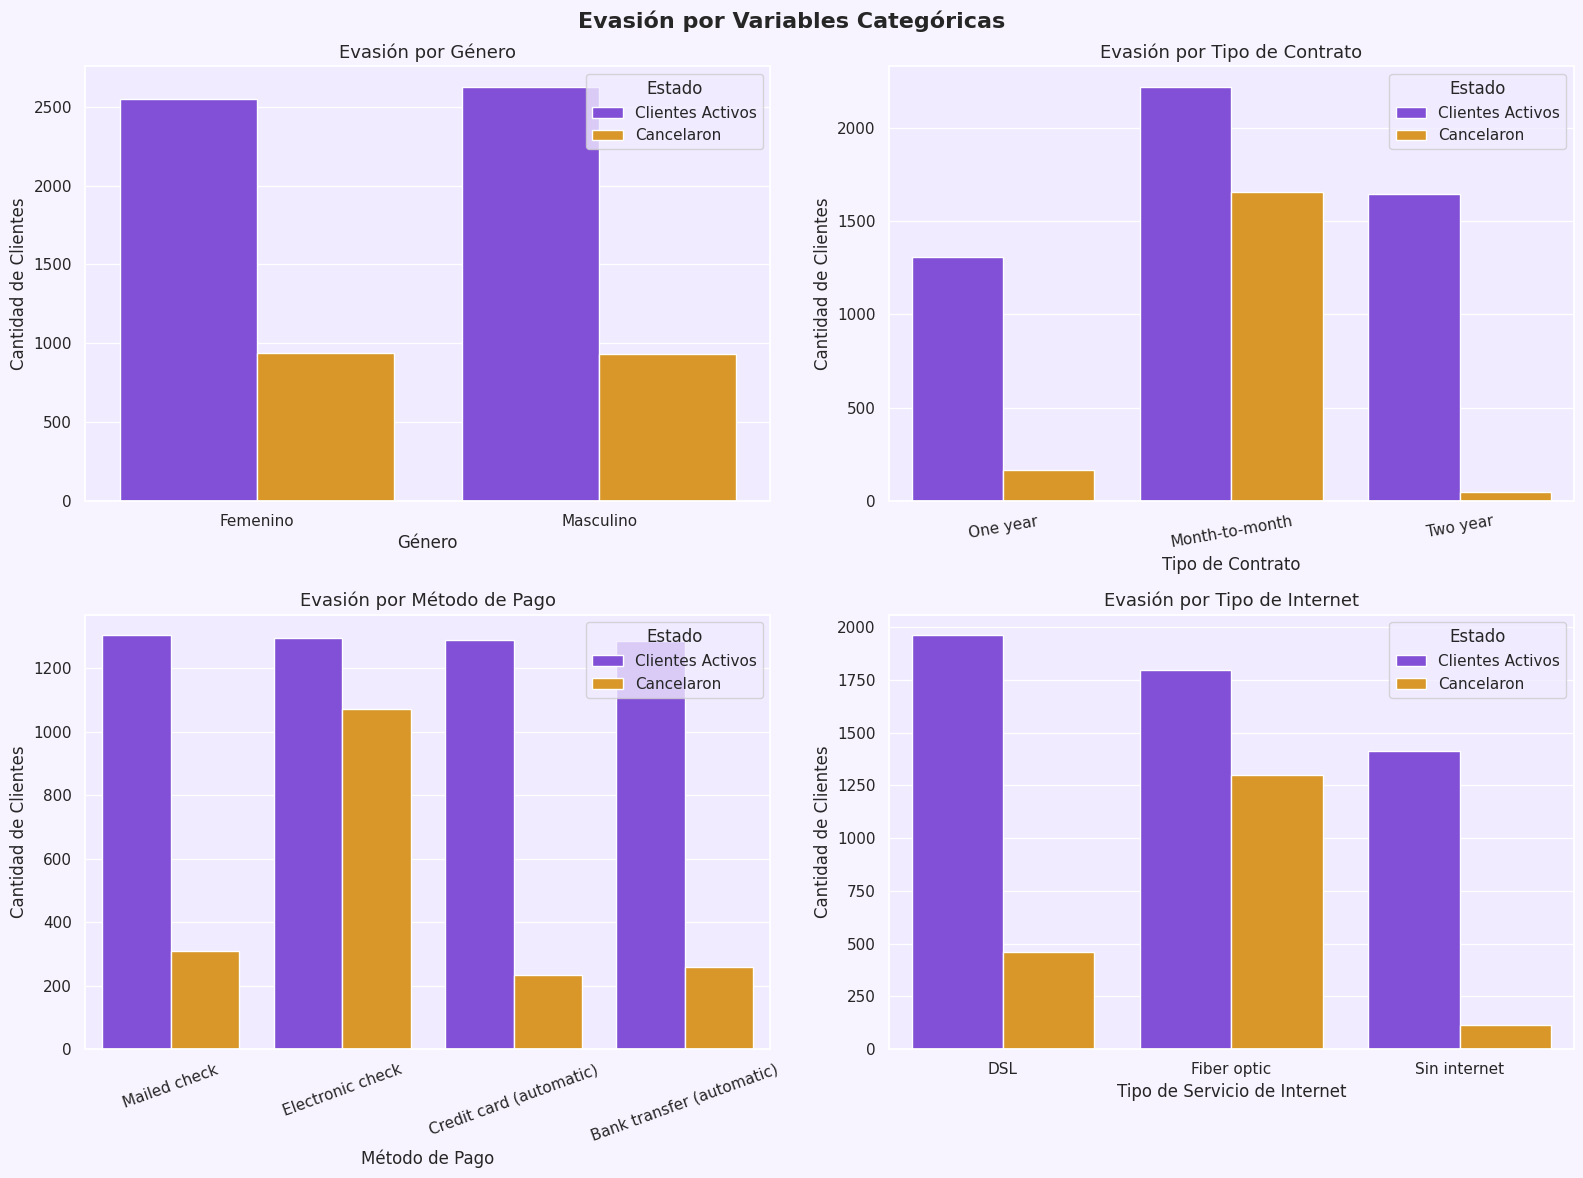

In [46]:
# --- Evasión por Variables Categóricas ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Evasión por Variables Categóricas', fontsize=16, fontweight='bold')

# Paleta con las claves reales de la columna Evasion ('Sí'/'No')
paleta = {'Sí':'#F59E0B' , 'No': '#7C3AED'}
legend_labels = [ 'Clientes Activos','Cancelaron']

# 1️⃣ Género
sns.countplot(x='Genero', hue='Evasion', data=df_limpio, palette=paleta, ax=axes[0, 0],
              hue_order=['No', 'Sí'])
axes[0, 0].set_title('Evasión por Género', fontsize=13)
axes[0, 0].set_xlabel('Género')
axes[0, 0].set_ylabel('Cantidad de Clientes')
axes[0, 0].legend(legend_labels, title='Estado')

# 2️⃣ Tipo de Contrato
sns.countplot(x='Tipo_Contrato', hue='Evasion', data=df_limpio, palette=paleta, ax=axes[0, 1],
              hue_order=['No', 'Sí'])
axes[0, 1].set_title('Evasión por Tipo de Contrato', fontsize=13)
axes[0, 1].set_xlabel('Tipo de Contrato')
axes[0, 1].set_ylabel('Cantidad de Clientes')
axes[0, 1].tick_params(axis='x', rotation=10)
axes[0, 1].legend(legend_labels, title='Estado')

# 3️⃣ Método de Pago
sns.countplot(x='Metodo_Pago', hue='Evasion', data=df_limpio, palette=paleta, ax=axes[1, 0],
              hue_order=['No', 'Sí'])
axes[1, 0].set_title('Evasión por Método de Pago', fontsize=13)
axes[1, 0].set_xlabel('Método de Pago')
axes[1, 0].set_ylabel('Cantidad de Clientes')
axes[1, 0].tick_params(axis='x', rotation=20)
axes[1, 0].legend(legend_labels, title='Estado')

# 4️⃣ Tipo de Internet
sns.countplot(x='Tipo_Internet', hue='Evasion', data=df_limpio, palette=paleta, ax=axes[1, 1],
              hue_order=['No', 'Sí'])
axes[1, 1].set_title('Evasión por Tipo de Internet', fontsize=13)
axes[1, 1].set_xlabel('Tipo de Servicio de Internet')
axes[1, 1].set_ylabel('Cantidad de Clientes')
axes[1, 1].legend(legend_labels, title='Estado')

plt.tight_layout()
plt.show()
plt.close()


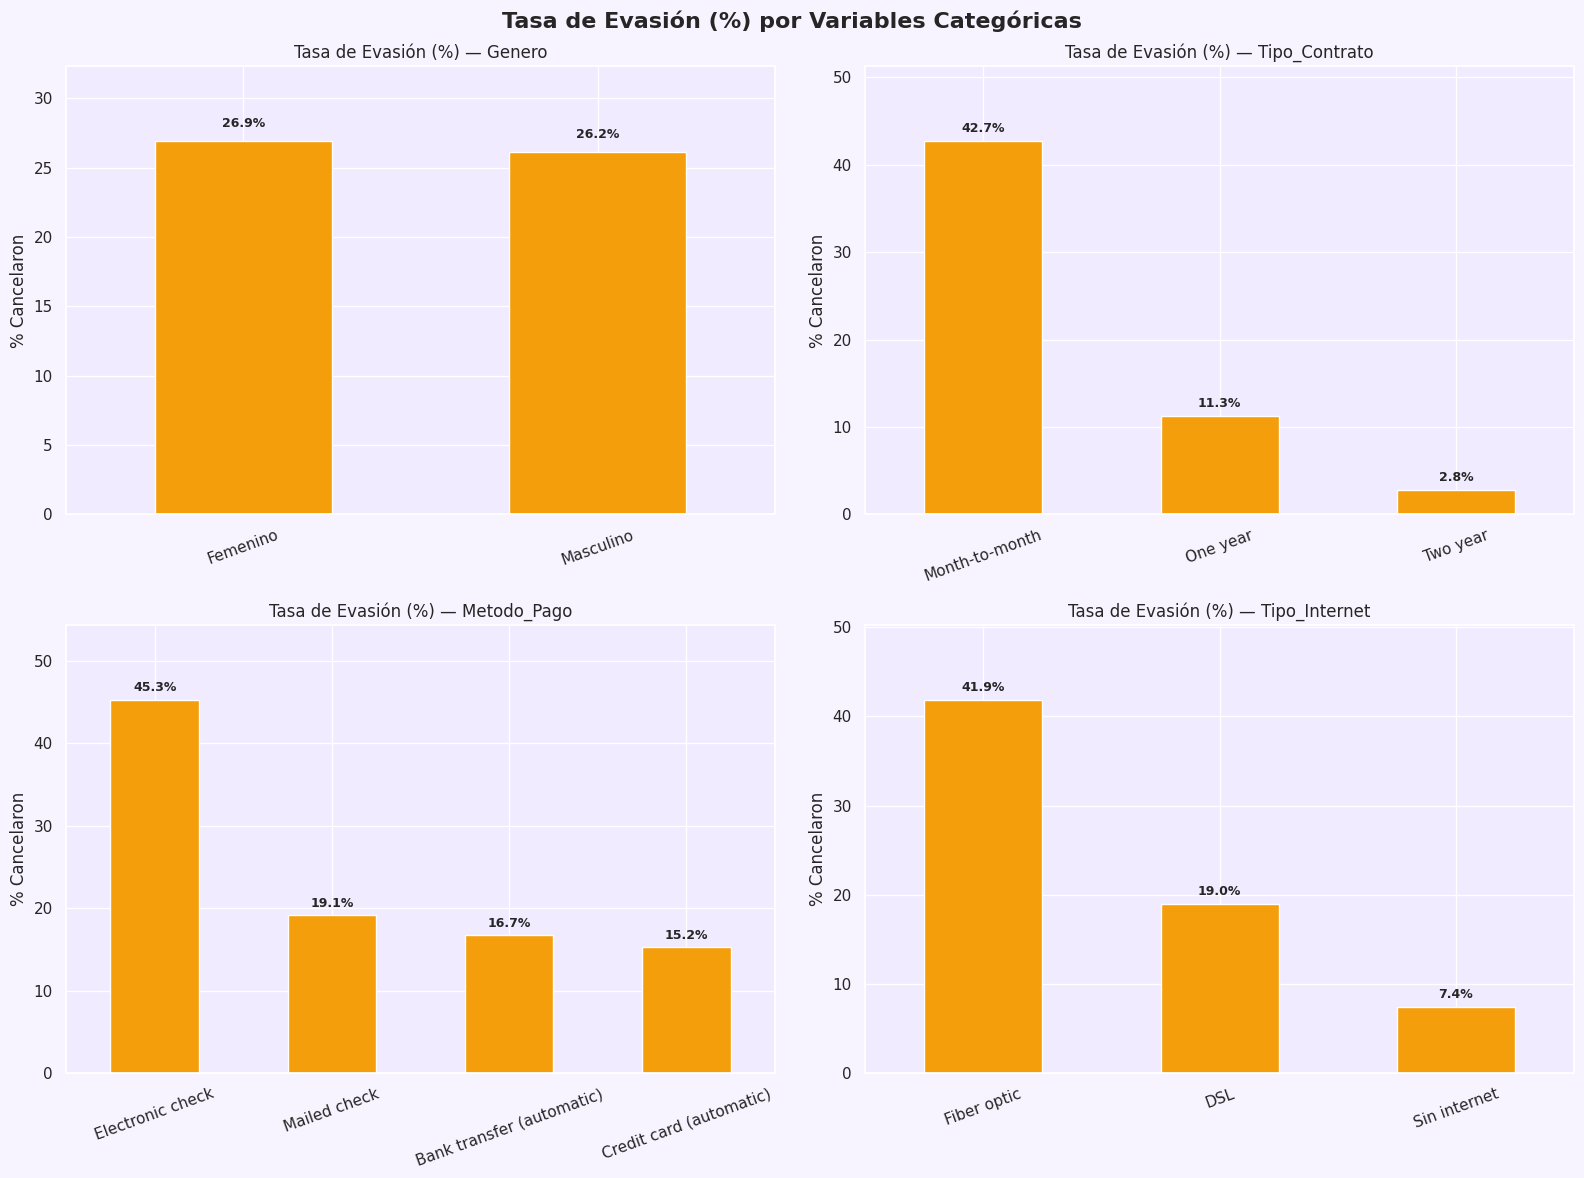

In [49]:
# --- Tasa de Evasión (%) por Variables Categóricas — Normalizado ---

variables = ['Genero', 'Tipo_Contrato', 'Metodo_Pago', 'Tipo_Internet']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Tasa de Evasión (%) por Variables Categóricas',
             fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, var in enumerate(variables):
    # Tabla cruzada normalizada por fila (% dentro de cada categoría)
    tabla = pd.crosstab(df_limpio[var], df_limpio['Evasion'], normalize='index') * 100

    # Clave 'Sí' para la tasa de cancelación (antes era 1, causaba KeyError)
    if 'Sí' not in tabla.columns:
        print(f'⚠ Variable {var}: no hay columna Sí en crosstab. Valores: {tabla.columns.tolist()}')
        continue

    tasa_cancelacion = tabla['Sí'].sort_values(ascending=False)

    tasa_cancelacion.plot(kind='bar', ax=axes[i], color='#F59E0B', edgecolor='white')

    axes[i].set_title(f'Tasa de Evasión (%) — {var}', fontsize=12)
    axes[i].set_ylabel('% Cancelaron')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=20)
    axes[i].set_ylim(0, tasa_cancelacion.max() * 1.2)

    for idx_bar, valor in enumerate(tasa_cancelacion):
        axes[i].text(idx_bar, valor + 1, f'{valor:.1f}%',
                     ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()
plt.close()


## 📌 Paso 10: Conteo de Evasión por Variables Numéricas

Exploramos cómo las **variables numéricas** — como el total gastado o el tiempo de contrato — se distribuyen entre clientes que evadieron y los que no.

> Ayuda a entender si ciertos valores numéricos están más asociados con la evasión, identificando factores clave del comportamiento de los clientes.

In [50]:
# Confirmación de valores en Evasion antes de graficar
assert set(df_limpio['Evasion'].dropna().unique()) == {'Sí', 'No'}, \
    "ERROR: Evasion contiene valores inesperados: " + str(df_limpio['Evasion'].unique())
print(f"✅ Evasion contiene solo 'Sí' y 'No'. Listo para graficar.")


✅ Evasion contiene solo 'Sí' y 'No'. Listo para graficar.


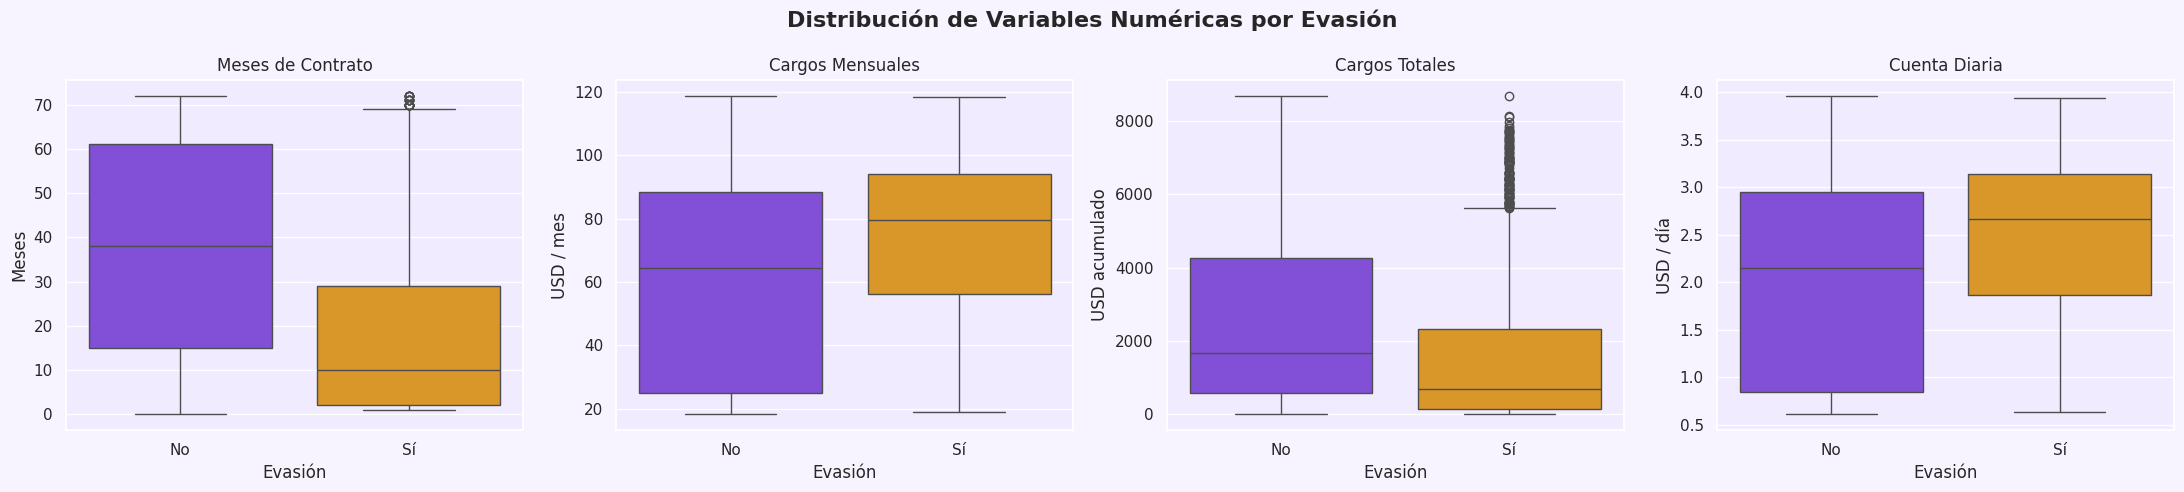



📊 COMPARATIVA DE MEDIAS POR GRUPO DE EVASIÓN


,Meses_Contrato,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
Evasion,,,,
Activos,37.57,61.27,2549.91,2.04
Cancelaron,17.98,74.44,1531.80,2.48


In [55]:
# --- Evasión por Variables Numéricas: Boxplots comparativos ---

fig, axes = plt.subplots(1, 4, figsize=(22, 5))
fig.suptitle('Distribución de Variables Numéricas por Evasión',
             fontsize=16, fontweight='bold')

# Paleta con las claves reales: 'Sí' y 'No'
paleta_box  = {'Sí': '#F59E0B' , 'No':'#7C3AED'}
hue_order   = ['No','Sí']

# 1. Meses de Contrato
sns.boxplot(x='Evasion', y='Meses_Contrato',   data=df_limpio,
            palette=paleta_box, order=hue_order, ax=axes[0])
axes[0].set_title('Meses de Contrato', fontsize=12)
axes[0].set_xlabel('Evasión')
axes[0].set_ylabel('Meses')

# 2. Cargos Mensuales
sns.boxplot(x='Evasion', y='Cargos_Mensuales', data=df_limpio,
            palette=paleta_box, order=hue_order, ax=axes[1])
axes[1].set_title('Cargos Mensuales', fontsize=12)
axes[1].set_xlabel('Evasión')
axes[1].set_ylabel('USD / mes')

# 3. Cargos Totales
sns.boxplot(x='Evasion', y='Cargos_Totales',   data=df_limpio,
            palette=paleta_box, order=hue_order, ax=axes[2])
axes[2].set_title('Cargos Totales', fontsize=12)
axes[2].set_xlabel('Evasión')
axes[2].set_ylabel('USD acumulado')

# 4. Cuentas Diarias
sns.boxplot(x='Evasion', y='Cuentas_Diarias',  data=df_limpio,
            palette=paleta_box, order=hue_order, ax=axes[3])
axes[3].set_title('Cuenta Diaria', fontsize=12)
axes[3].set_xlabel('Evasión')
axes[3].set_ylabel('USD / día')

plt.tight_layout()
plt.show()

# --- Tabla comparativa de medias ---
print('\n')
print('=' * 65)
print("📊 COMPARATIVA DE MEDIAS POR GRUPO DE EVASIÓN")
print('=' * 65)
tabla_medias = (
    df_limpio.groupby('Evasion')[cols_num]
             .mean()
             .round(2)
             .reindex(['No','Sí'])
             .rename(index={'No': 'Activos', 'Sí': 'Cancelaron'})
)

display(tabla_medias)


---
# 🌟 EXTRA — Análisis de Correlación entre Variables *(Opcional)*
---

Como paso adicional, exploramos la **correlación entre diferentes variables** del dataset para identificar cuáles tienen mayor relación con la evasión:

- 🔹 La relación entre la **cuenta diaria** y la evasión.
- 🔹 Cómo la **cantidad de meses** de contrato afecta la probabilidad de churn.

Usamos `corr()` de Pandas y visualizamos con una matriz de calor y un gráfico de dispersión. 🚀

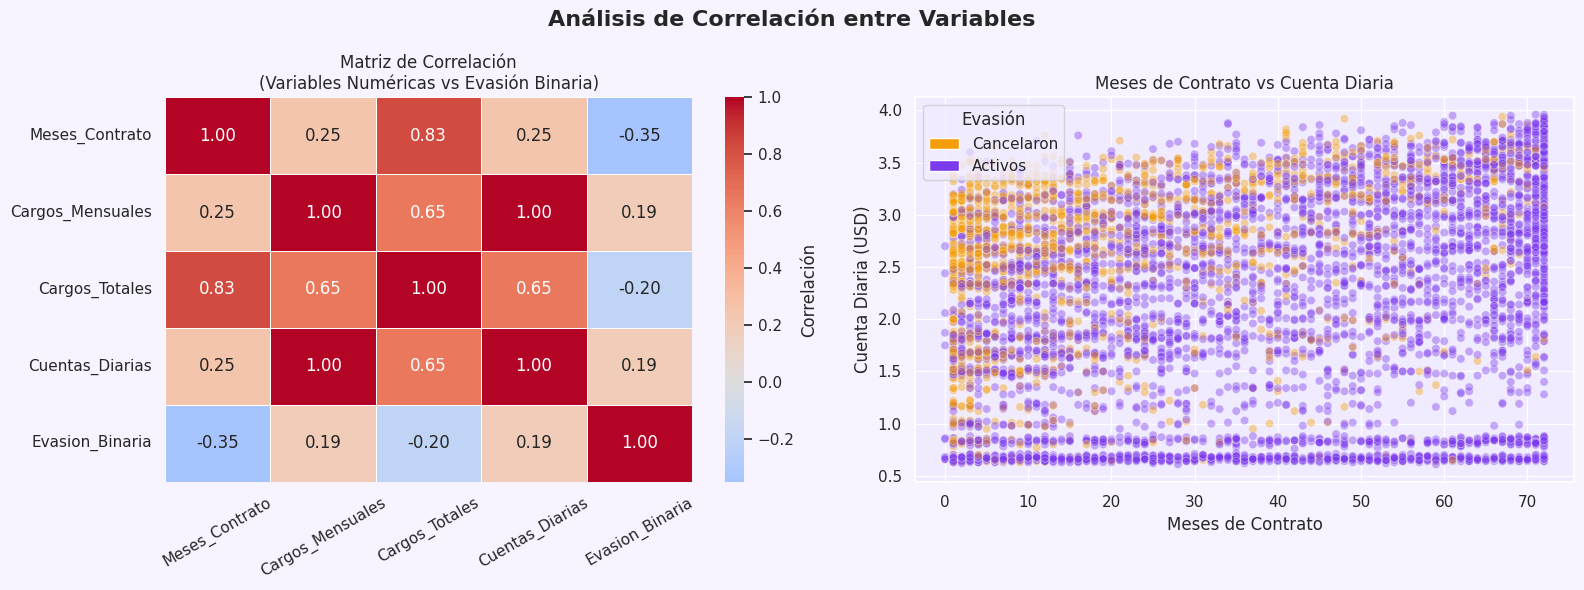




📊 Correlación con Evasión Binaria (de mayor a menor influencia):
Meses_Contrato     -0.352
Cargos_Totales     -0.198
Cuentas_Diarias     0.193
Cargos_Mensuales    0.193
Name: Evasion_Binaria, dtype: float64


In [64]:
# --- Análisis de Correlación ---

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Análisis de Correlación entre Variables',
             fontsize=16, fontweight='bold')

# 1. Matriz de correlación (variables numéricas + Evasion_Binaria)
cols_corr   = ['Meses_Contrato', 'Cargos_Mensuales', 'Cargos_Totales',
               'Cuentas_Diarias', 'Evasion_Binaria']
corr_matrix = df_limpio[cols_corr].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    ax=axes[0],
    cbar_kws={'label': 'Correlación'}
)
axes[0].set_title('Matriz de Correlación\n(Variables Numéricas vs Evasión Binaria)',
                  fontsize=12)
axes[0].tick_params(axis='x', rotation=30)

# 2. Scatter: Meses de Contrato vs Cuenta Diaria, coloreado por Evasión
# Usar Evasion (Sí/No) para el color — columna garantizada limpia

sns.scatterplot(
    data=df_limpio,
    x='Meses_Contrato',
    y='Cuentas_Diarias',
    hue='Evasion',
    palette={'Sí':'#F59E0B', 'No':'#7C3AED'},
    alpha=0.4,
    ax=axes[1]
)

from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor='#F59E0B', label='Cancelaron'),
    Patch(facecolor='#7C3AED', label='Activos')
]

axes[1].legend(handles=legend_elements, title='Evasión')

axes[1].set_title('Meses de Contrato vs Cuenta Diaria', fontsize=12)
axes[1].set_xlabel('Meses de Contrato')
axes[1].set_ylabel('Cuenta Diaria (USD)')

plt.tight_layout()
plt.show()

# Ranking de correlación (sin duplicar print)
print('\n')
print('=' * 65)
print('\n📊 Correlación con Evasión Binaria (de mayor a menor influencia):')
print('=' * 65)
corr_evasion = (
    corr_matrix['Evasion_Binaria']
    .drop('Evasion_Binaria')
    .sort_values(key=abs, ascending=False)
)
print(corr_evasion.round(3))


---

<div style="background: linear-gradient(135deg, #3B0764 0%, #7C3AED 100%); padding: 2px 0; border-radius: 8px; margin-bottom: 4px;"></div>

# 📝 Informe Final — TelecomX
## Análisis de Evasión de Clientes (*Churn*)

<div style="background: linear-gradient(135deg, #3B0764 0%, #7C3AED 100%); padding: 2px 0; border-radius: 8px; margin-top: 4px;"></div>

---

## 🎯 1. Introducción

**Telecom X** enfrenta un problema crítico de retención: una proporción significativa de sus clientes cancela el servicio cada mes, impactando directamente los ingresos recurrentes y aumentando los costos de adquisición de nuevos usuarios.

El presente análisis aplicó un proceso completo de **ETL (Extracción → Transformación → Carga)** sobre los datos históricos de la empresa, disponibles en su API oficial, con el objetivo de:

- Comprender **quiénes** son los clientes con mayor riesgo de evasión.
- Identificar **qué factores** están más asociados con la cancelación.
- Proveer **recomendaciones accionables** para reducir el churn.

> 📌 **Dataset:** 7,043 clientes · 21 variables originales · Período de datos: histórico acumulado por cliente.

---

## 🧹 2. Limpieza y Tratamiento de Datos

El dataset presentó los siguientes problemas que fueron corregidos sistemáticamente:

| Problema detectado | Acción aplicada | Resultado |
|---|---|---|
| `Charges.Total` y `Charges.Monthly` en formato string | `pd.to_numeric(..., errors='coerce')` | Convertidas a `float64` |
| 11 registros con `Charges.Total` vacío (`''`) | Relleno con `0` (clientes sin historial de cobro) | Sin pérdida de registros |
| Espacios ocultos en variables categóricas | `.str.strip()` en todas las columnas `object` | Categorías limpias y comparables |
| Registros duplicados | `drop_duplicates()` | 0 duplicados encontrados |
| Columnas en inglés con nombres técnicos | Renombrado al español | Mayor legibilidad |
| Variable `Churn` textual (Yes/No) | Codificación binaria `Evasion_Binaria` (1/0) | Lista para modelado |
| Ausencia de granularidad diaria | Nueva columna `Cuentas_Diarias = Cargos_Mensuales / 30` | Métrica enriquecida |

**Dataset resultante:** 7,043 filas × 23 columnas (21 originales + 2 creadas).

---

## 📊 3. Análisis Exploratorio de Datos

### 3.1 Tasa de Evasión General

De los 7,043 clientes analizados, **1,869 cancelaron el servicio**, lo que representa una tasa de evasión del **26.5%**. Es decir, 1 de cada 4 clientes abandona la empresa.

```
No evadió → 5,174 clientes (73.5%)
Evadió    → 1,869 clientes (26.5%)
```

Esta tasa es considerablemente alta para el sector de telecomunicaciones, donde el promedio de la industria se sitúa entre 10% y 20% anual.

---

### 📊 3.2 Variables Numéricas — Estadísticas Generales

| Métrica | Meses de contrato | Cargos mensuales (USD) | Cargos totales (USD) | Cuenta diaria (USD) |
|---|---:|---:|---:|---:|
| **Media** | 32.4 | 64.8 | 2,283 | 2.16 |
| **Mediana** | 29.0 | 70.4 | 1,397 | 2.35 |
| **Desv. estándar** | 24.6 | 30.1 | 2,267 | 1.00 |
| **Mínimo** | 0 | 0 | 0 | 0 |
| **Máximo** | 72 | 118.8 | 8,685 | 3.96 |

### 🔎 Comparativa Clave — Clientes que Evaden vs Permanecen

| Variable | Evadieron | Permanecieron | Diferencia |
|---|---:|---:|---:|
| Meses de contrato (media) | **18.0** | 37.6 | 🔻 **−19.6** |
| Cargos mensuales (media USD) | **74.4** | 61.3 | 🔺 **+13.1** |
| Cargos totales (media USD) | 1,532 | **2,555** | 🔻 −1,023 |
| Cuenta diaria (media USD) | **2.48** | 2.04 | 🔺 **+0.44** |

> Los clientes que evaden tienen contratos más cortos y pagan más mensualmente, lo que sugiere que son clientes nuevos o recientes que no perciben suficiente valor en el servicio.

---

### 📄 3.3 Tipo de Contrato — El Factor Más Crítico

| Tipo de contrato | Tasa de evasión |
|---|---|
| **Month-to-month** | **~42.7%** ⚠️ |
| One year | ~11.3% |
| Two year | ~2.8% |

Los clientes con contrato mensual representan la mayoría de los que evaden. A mayor compromiso contractual, dramáticamente menor es la probabilidad de abandono.

---

### 🛜 3.4 Tipo de Internet — Fibra óptica, mayor riesgo

| Tipo de internet | Tasa de evasión |
|---|---|
| **Fiber optic** | **~41.9%** ⚠️ |
| DSL | ~19.0% |
| No internet service | ~7.4% |

Los usuarios de fibra óptica presentan la mayor tasa de churn. Esto puede responder a mayor sensibilidad al precio (tarifas más altas) o a expectativas de calidad no satisfechas.

---

### 💳 3.5 Método de Pago — Cheque electrónico, señal de alerta

| Método de pago | Tasa de evasión |
|---|---|
| **Electronic check** | **~45.3%** ⚠️ |
| Mailed check | ~19.1% |
| Bank transfer (auto) | ~16.7% |
| Credit card (auto) | ~15.2% |

El cheque electrónico está fuertemente asociado con la evasión. Los métodos automáticos (débito y tarjeta) presentan tasas significativamente menores, posiblemente porque crean mayor inercia en la relación con el servicio.

---

### 3.6 Correlaciones con Evasión (variables numéricas)

| Variable | Correlación con Evasión | Interpretación |
|---|---|---|
| `Meses_Contrato` | **−0.35** | A más tiempo, menos evasión |
| `Cargos_Mensuales` | **+0.19** | A mayor costo mensual, más evasión |
| `Cuentas_Diarias` | **+0.19** | (derivada de Cargos_Mensuales) |
| `Cargos_Totales` | **−0.20** | Efecto indirecto de la permanencia |

> La correlación negativa de `Cargos_Totales` con evasión se explica porque clientes con mayor tiempo acumulan más pagos totales — **no** indica que pagar más total proteja de la evasión.

---

### 3.7 Género — Sin impacto significativo

La distribución de evasión es prácticamente idéntica entre hombres y mujeres (~26% en ambos grupos), confirmando que el género **no es un predictor relevante** del churn.

---

## 💡 4. Conclusiones e Insights

| # | Factor | Relación con Evasión | Insight clave |
|---|---|---|---|
| 1 | **Tipo de contrato** | 🔴 Alta (positiva) | Contratos mes a mes tienen 15× más evasión que bianuales |
| 2 | **Tiempo de permanencia** | 🟠 Alta (negativa) | Los primeros 12 meses son el período de mayor riesgo |
| 3 | **Método de pago** | 🟠 Alta (positiva) | Cheque electrónico = señal de baja fidelización |
| 4 | **Tipo de internet** | 🟡 Moderada (positiva) | Fibra óptica con alto costo y alta evasión |
| 5 | **Cargos mensuales** | 🟡 Moderada (positiva) | Tarifa elevada sin valor percibido = riesgo |
| 6 | **Género** | ⚪ Nula | No diferencia el comportamiento de evasión |

**Perfil del cliente con mayor riesgo de evasión:**
> Cliente nuevo (< 12 meses), contrato mensual, servicio de fibra óptica, que paga con cheque electrónico y tiene cargos mensuales superiores a $70 USD.

---

## 🚀 5. Recomendaciones Estratégicas

### 🎯 Prioridad Alta

**1. Programa de migración contractual**
Ofrecer incentivos para convertir contratos mensuales a anuales o bianuales: descuento del primer mes, upgrades de velocidad o meses gratis. El impacto esperado es una reducción de hasta 30 puntos porcentuales en la tasa de evasión de ese segmento.

**2. Onboarding reforzado para clientes nuevos**
Implementar un programa de acompañamiento activo durante los primeros 6 meses: llamadas proactivas, beneficios de fidelización progresivos y soporte prioritario. El 50% de las evasiones ocurren en este período crítico.

### 🟡 Prioridad Media

**3. Incentivo al pago automático**
Ofrecer un descuento mensual fijo (ej. 5%) para clientes que migren de cheque electrónico a débito automático o tarjeta de crédito. Reduce la fricción de pago y aumenta la inercia de permanencia.

**4. Revisión de propuesta de valor en fibra óptica**
Auditar la satisfacción de clientes con fibra óptica: si la tasa de evasión (\~42%) supera a DSL (\~19%), existe una brecha de expectativa-realidad que debe cerrarse con mejoras de servicio o ajuste de precios.

### 🔵 Prioridad Estratégica

**5. Modelo predictivo de churn**
Con las variables identificadas (`Tipo_Contrato`, `Meses_Contrato`, `Metodo_Pago`, `Tipo_Internet`, `Cargos_Mensuales`), construir un modelo de clasificación supervisada (Random Forest o XGBoost) que permita identificar clientes en riesgo **antes** de que cancelen, habilitando intervenciones preventivas personalizadas.

---

<div style="background: linear-gradient(135deg, #3B0764 0%, #7C3AED 50%, #F59E0B 100%); padding: 2px 0; border-radius: 8px;"></div>

> *Análisis desarrollado con Python · pandas · matplotlib · seaborn*  
> *Dataset: TelecomX API — Alura Latam + Oracle Next Education*

> *Author: Daniela Andrea Puebla Mosca*

In [ ]:
# --- Exportar dataset limpio (para equipo de Data Science) ---


print("📤 Exportando dataset limpio...")

df_limpio.to_csv("telecomx_limpio.csv", index=False)

print("✅ Archivo guardado: telecomx_limpio.csv")
print(f"📊 Dataset final: {df_limpio.shape[0]:,} filas × {df_limpio.shape[1]} columnas")
print("🔍 Verificación final de nulos:")
display(df_limpio.isnull().sum())